# GC content

In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# tools which use the dinucleotide positional features 
tools_of_interest = ['tuscan-classification' ,'tuscan-regression'] #, 'chop-chop-doench'] # , 'wu-crispr']
dataset_name = 'doench'

In [3]:
gc_name = 'gc' # most tools measure the gc content

# wu-crispr has 2 flags
gc_low = 'c3_GC_pc_gt_80_sd' # more than 80%
gc_high = 'c3_GC_pc_lt_30_sd' # less than 30%

## Extract SHAP values for gc by tool and data point

In [4]:
# Compute one value per tool-data point

data_values_gc = []
data_shap_gc = {}
for t in tools_of_interest: 
    pickle_name = "./pickles/SHAP-" + str(t) + "-" + str(dataset_name)

    # load the shap values and dataset values
    p = open(pickle_name, "rb")
    shap_values = pickle.load(p)
    dataset = pickle.load(p)
    p.close()
    
    # format a bit the shap values
    features = dataset.columns
    shap_values = pd.DataFrame(shap_values,columns = features)
    dataset = pd.DataFrame(dataset)

    # record the data
    data_shap_gc['gc'] = dataset[gc_name]
    data_shap_gc[t] = shap_values[gc_name]
    

In [5]:
shap_gc_df = pd.DataFrame(data_shap_gc)

shap_gc_df = shap_gc_df.sort_values('gc')
shap_gc_df

,gc,tuscan-classification,tuscan-regression
741,26.67,-0.091237,-0.098992
457,26.67,-0.156606,-0.076713
756,30.00,-0.195125,-0.104773
542,30.00,-0.146342,-0.036527
434,30.00,-0.096180,-0.073855
...,...,...,...
1811,93.33,-0.028611,0.080842
1680,93.33,-0.150539,0.051528
1779,93.33,-0.160265,0.055035
1659,93.33,-0.057059,0.057454


## Plotting

In [6]:
x1 = shap_gc_df['gc']
y1 = shap_gc_df['tuscan-classification']
y2 = shap_gc_df['tuscan-regression']

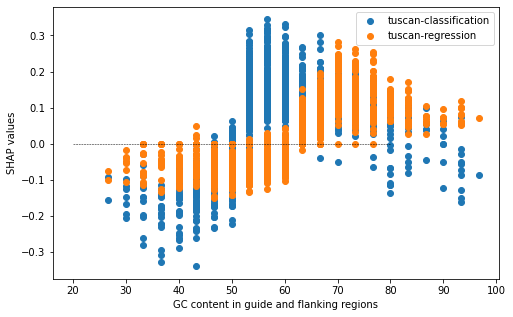

In [7]:
plt.figure(figsize=(8,5))
plt.scatter(x1,y1, label='tuscan-classification')
plt.scatter(x1,y2, label='tuscan-regression')
plt.plot(np.arange(20,81,10),[0]*7, color='black',linestyle='--',linewidth=0.5)
plt.xlabel("GC content in guide and flanking regions")
plt.ylabel("SHAP values")
plt.legend()

## Attempt to see gc in chop chop doench and wu-crispr

In [8]:
tools = ['chop-chop-doench','wu-crispr']
data_shap_gc = {}

In [9]:
for t in tools:
    pickle_name = "./pickles/SHAP-" + t + "-" + str(dataset_name)

    # load the shap values and dataset values
    p = open(pickle_name, "rb")
    shap_values = pickle.load(p)
    dataset = pickle.load(p)
    p.close()
    
    # format a bit the shap values
    features = dataset.columns
    shap_values = pd.DataFrame(shap_values,columns = features)
    dataset = pd.DataFrame(dataset)

    # record the data
    if 'gc' in features:
        data_shap_gc['gc'] = dataset[gc_name] / 20 * 100
        data_shap_gc[t] = shap_values[gc_name]
        
    else: 
        sh = []
        
        for d in range(0, len(dataset[gc_low])):
            if dataset[gc_low][d] == 1: 
                sh.append(shap_values[gc_low][d])
            elif dataset[gc_high][d] == 1:
                sh.append(shap_values[gc_high][d])
            else:
                sh.append(0)
        
        data_shap_gc[t] = sh
    

In [10]:
shap_gc_df = pd.DataFrame(data_shap_gc)

shap_gc_df = shap_gc_df.sort_values('gc')
shap_gc_df

,gc,chop-chop-doench,wu-crispr
500,20.0,-0.866835,-0.014463
683,25.0,-0.664209,-0.006616
985,25.0,-0.664209,-0.016973
551,25.0,-0.664209,-0.011077
510,25.0,-0.664209,-0.015533
...,...,...,...
1652,95.0,-1.151278,-0.009912
1668,95.0,-1.150369,-0.006001
1743,100.0,-1.316957,-0.010081
1681,100.0,-1.316957,-0.009829


### Scale the SHAP values by tool

In [11]:
df = shap_gc_df

In [12]:
def scaleCol(df, col):
    max_val = df[col].max()
    min_val = df[col].min()
    
    max_abs = abs(max_val)
    if abs(min_val) > max_abs:
        max_abs = abs(min_val)
        
    df[col] /= max_abs

In [13]:
scaleCol(df,'wu-crispr')
scaleCol(df,'chop-chop-doench')

In [14]:
df

,gc,chop-chop-doench,wu-crispr
500,20.0,-0.658210,-0.794368
683,25.0,-0.504351,-0.363343
985,25.0,-0.504351,-0.932184
551,25.0,-0.504351,-0.608396
510,25.0,-0.504351,-0.853121
...,...,...,...
1652,95.0,-0.874195,-0.544367
1668,95.0,-0.873506,-0.329567
1743,100.0,-1.000000,-0.553652
1681,100.0,-1.000000,-0.539828


In [15]:
x2 = df['gc']
y3 = df['chop-chop-doench']
y4 = df['wu-crispr']

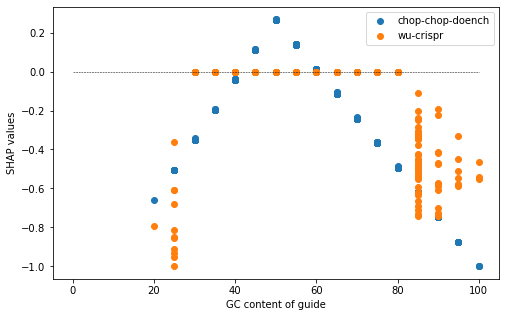

In [16]:
plt.figure(figsize=(8,5))
plt.scatter(x2, y3, label='chop-chop-doench')
plt.scatter(x2, y4, label='wu-crispr')
plt.plot(np.arange(0,101,10),[0]*11, color='black',linestyle='--',linewidth=0.5)
plt.xlabel("GC content of guide")
plt.ylabel("SHAP values")
plt.legend()

## Put plots side by side

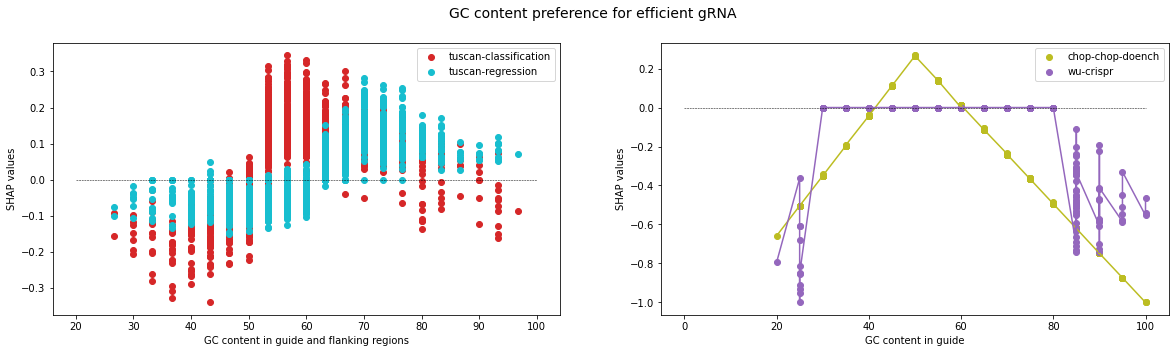

In [19]:
fig = plt.figure(figsize=(20,5))
fig.suptitle("GC content preference for efficient gRNA", fontsize=14)

ax1 = plt.subplot(121)
plt.scatter(x1,y1, label='tuscan-classification', color='tab:red')
plt.scatter(x1,y2, label='tuscan-regression', color='tab:cyan')
plt.plot(np.arange(20,101,10),[0]*9, color='black',linestyle='--',linewidth=0.5)
plt.xlabel("GC content in guide and flanking regions")
plt.ylabel("SHAP values")
plt.legend()

ax2 = plt.subplot(122)
plt.scatter(x2, y3, label='chop-chop-doench', color='tab:olive')
plt.plot(x2,y3, color='tab:olive')
plt.scatter(x2, y4, label='wu-crispr', color='tab:purple')
plt.plot(x2, y4, color='tab:purple')
plt.plot(np.arange(0,101,10),[0]*11, color='black',linestyle='--',linewidth=0.5)
plt.xlabel("GC content in guide")
plt.ylabel("SHAP values")
plt.legend()


plt.savefig('./GCcontentDo.png')
plt.show()
